<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex4_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from sklearn import datasets
import torch

In [0]:
iris_data = datasets.load_iris()

x = torch.tensor([iris_data.data[:, 2], iris_data.data[:, 3]]).float()
n = x.size()[1]
u = torch.tensor([[x[0].mean()], [x[1].mean()]])
sigma = (x-u).mm((x-u).t()) / n

x_normal_0 = (x - u)[0] / (sigma[0, 0] ** .5)
x_normal_1 = (x - u)[1] / (sigma[1, 1] ** .5)

In [0]:
#compute the eigenvalue and eigenvector of matrix sigma
#s is the rotation matrix
#lam(lambda) is a diagonal matrix consisting of eigenvalue of sigma

In [0]:
s = sigma.eig(eigenvectors = True)[1]
s = s.mm(torch.tensor([[1,0],[0,-1]]).float())#adjust to the sample in text
#lam = s.inverse().mm(sigma.mm(s)) #This code lead an float error
s_eigenvalue = sigma.eig(eigenvectors = True)[0][:,0]
lam = torch.tensor([[1,0],[0,1]])*(s_eigenvalue)

In [0]:
#whiten the dataset(x)

In [0]:
x_whitened = (lam ** .5).inverse().mm(s.t().mm((x-u)))

In [0]:
#visualization

Text(0, 0.5, 'width of iris')

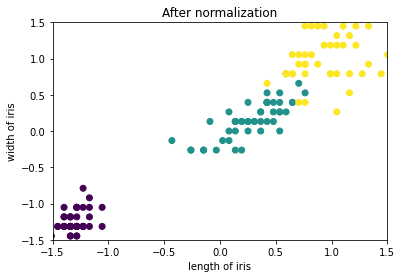

In [6]:
species = iris_data.target

plt.figure('After normalization')
plt.title('After normalization')
plt.scatter(x_normal_0, x_normal_1, c = species)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel('length of iris')
plt.ylabel('width of iris')

Text(0, 0.5, 'width of iris')

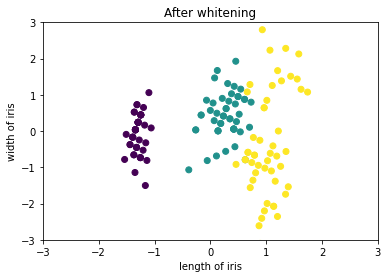

In [7]:
plt.figure('After whitening')
plt.title('After whitening')
plt.scatter(x_whitened[0], x_whitened[1], c = species)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.xlabel('length of iris')
plt.ylabel('width of iris')